In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ds_original = pd.read_csv("crimes_selected.csv")
ds_new = pd.read_csv("working_dataset.csv")

In [2]:
ds_original.head()

,CASE_NUMBER,Date,Block,Location Description,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude
0,hs227745,03/27/2010 04:50:00 AM,124xx_s_michigan_ave,house,False,532,5.0,9.0,53.0,41.668569,-87.620189
1,hs335199,05/31/2010 03:44:00 AM,026xx_s_ridgeway_ave,alley,False,1031,10.0,22.0,30.0,41.843516,-87.718433
2,hs440368,08/01/2010 12:32:00 PM,124xx_s_eggleston_ave,house,False,523,5.0,34.0,53.0,41.668029,-87.633158
3,hs460541,08/13/2010 01:03:00 PM,020xx_e_71st_st,street,False,331,3.0,5.0,43.0,41.766250,-87.575528
4,hs501948,09/06/2010 06:55:00 PM,027xx_w_24th_st,auto,False,1034,10.0,12.0,30.0,41.848287,-87.693730


In [3]:
ds_new.head()

,CASE_NUMBER,NUM_CRIMES_DISTRICT,NUM_CRIMES_BEAT,NUM_CRIMES_COMM_AREA,NUM_CRIMES_WARD,NUM_CRIMES_BLOCK,NUM_CRIMES_ZIP_CODE,NUM_CRIMES_STREET_ORG,AREA_INCOME,AREA_ASSAULT_HOMICIDE,...,IS_KILLED_A_CHILD,MULTIPLE_ARRESTS,HAS_STREET_ORGANIZATION,IS_RATIAL,ARRESTED_RACE,VICTIM_RACE,AVER_AGE,AVG_NUM_CHARGES,IMMEDIATE_ARREST,IS_HOMICIDE
0,hs227745,142,13,56,90,1,145,0,16228,43.9,...,0,0,0,0,_4102,_4100,35.0,2.0,0,1
1,hs335199,153,12,52,44,1,185,50,10697,11.1,...,0,0,1,0,_1142,_1140,25.0,1.0,0,1
2,hs440368,142,20,56,95,1,145,30,16228,43.9,...,0,0,1,0,_1142,_1140,25.0,1.0,0,1
3,hs460541,180,23,101,68,2,117,103,18366,33.4,...,0,0,1,0,_1142,_1140,25.0,1.0,0,1
4,hs501948,153,11,52,41,2,60,7,10697,11.1,...,0,0,1,0,_1142,_1140,25.0,1.0,0,1


<AxesSubplot:>

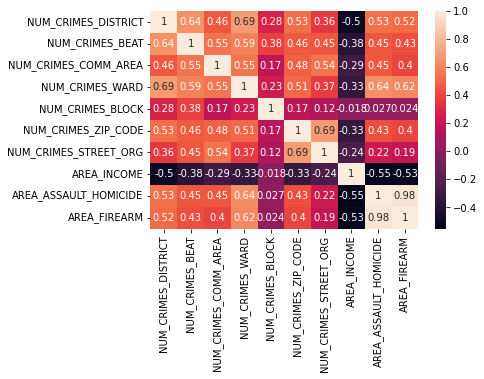

In [4]:
sns.heatmap(ds_new.corr().iloc[0:10, 0:10], annot=True)

<AxesSubplot:>

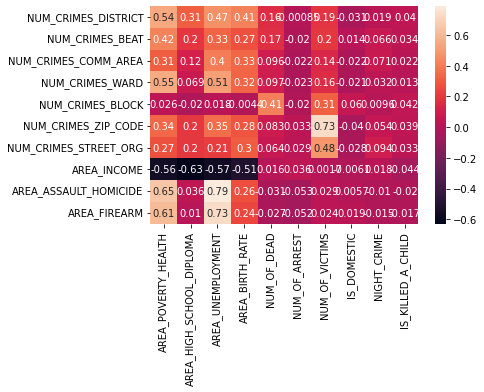

In [5]:
sns.heatmap(ds_new.corr().iloc[0:10, 10:20], annot=True)

<AxesSubplot:>

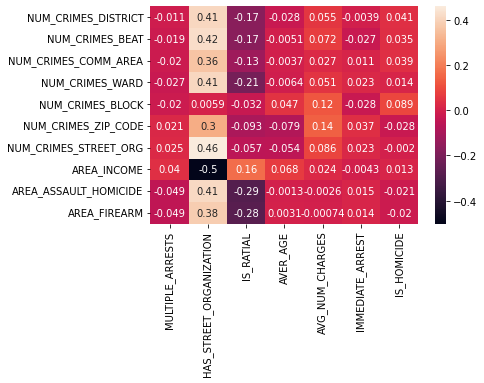

In [6]:
sns.heatmap(ds_new.corr().iloc[0:10, 20:30], annot=True)

<AxesSubplot:>

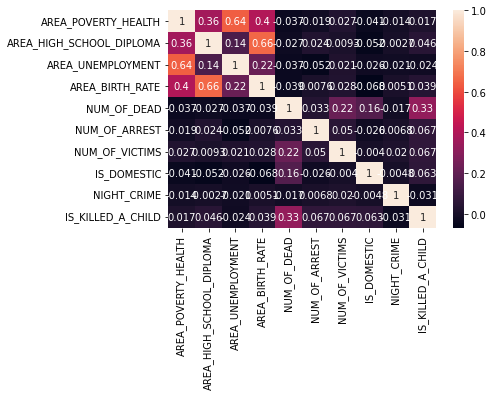

In [7]:
sns.heatmap(ds_new.corr().iloc[10:20, 10:20], annot=True)

<AxesSubplot:>

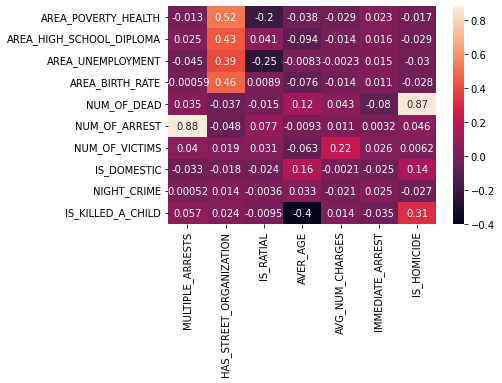

In [8]:
sns.heatmap(ds_new.corr().iloc[10:20, 20:30], annot=True)

<AxesSubplot:>

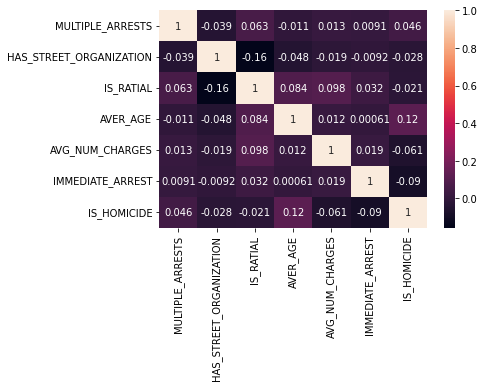

In [9]:
sns.heatmap(ds_new.corr().iloc[20:30, 20:30], annot=True)

0.506095163193079


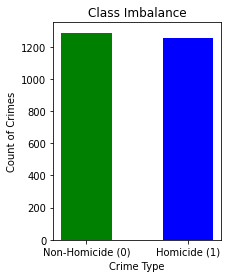

In [10]:
# Plotting the Imbalance

x=['Non-Homicide (0)','Homicide (1)']
y=[len(ds_new[ds_new['IS_HOMICIDE'] == 0]), len(ds_new[ds_new['IS_HOMICIDE'] == 1])]
fig, ax = plt.subplots(figsize=(3, 4))
plt.bar(x,y, color=['green', 'blue', 'red'], width=0.5)
# plt.title('THE IMBALANCE IN THE DATASET')
plt.xlabel('Crime Type')
plt.ylabel('Count of Crimes')
plt.title("Class Imbalance")
print(str(len(ds_new[ds_new['IS_HOMICIDE'] == 0]) / (len(ds_new[ds_new['IS_HOMICIDE'] == 0]) + len(ds_new[ds_new['IS_HOMICIDE'] == 1]))))

In [11]:
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error, mean_squared_error, accuracy_score,\
    max_error

# for average -> "macro" or "micro"
def print_classifier_scores(true_y, pred_y, beta=1.0, average="macro"):
    
    (pr, rec, f_sc, su) = precision_recall_fscore_support(y_true=true_y, y_pred=pred_y, beta=beta, average=average)
    acc = accuracy_score(y_true=true_y, y_pred=pred_y)
    print("Accuracy:\t" + str(acc))
    print("Precision:\t" + str(pr))
    print("Recall:\t\t" + str(rec))
    print("F-measure" + ":\t" + str(f_sc))
    print("(beta " + str(beta) + ")")

In [12]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone

def k_fold(X: pd.DataFrame, y: pd.Series, n_folds: int, classifier, verbose=False):

    kf = model_selection.KFold(n_splits=n_folds)
    i_train = 0
    i_test = 0
    j = 1
    max_score = 0
    curr_test_score = 0
    
    """
    if model_type=="tree":
        curr_tree = DecisionTreeClassifier(max_depth=5)
    elif model_type=="grad_boost":
        curr_tree = GradientBoostingClassifier()
    elif model_type=="random_forest":
        curr_tree = RandomForestClassifier(n_estimators=20)
        """
    

    for train_indexes, test_indexes in kf.split(X, y):
        curr_classifier = clone(classifier)
        curr_classifier = curr_classifier.fit(X.iloc[train_indexes], y[train_indexes])
        
        curr_train_score = curr_classifier.score(X.iloc[train_indexes], y[train_indexes])
        curr_test_score = curr_classifier.score(X.iloc[test_indexes], y[test_indexes])

        if verbose:
            print("Fold " + str(j) + "/" + str(n_folds))
            print("--------MODEL " + str(j) + " QUALITY--------")

            print("-------| Training |-----------")

            print_classifier_scores(true_y=y[train_indexes], 
                                pred_y=curr_classifier.predict(X.iloc[train_indexes]), beta=2.0)
        
            print("-------|   Test   |-----------")
            true_y = y[test_indexes]
            pred_y = curr_classifier.predict(X.iloc[test_indexes])
            print_classifier_scores(true_y=true_y, pred_y=pred_y, beta=2.0)


        if curr_test_score > max_score:
            best_classifier = curr_classifier
            max_score = curr_test_score

        j += 1
        i_train += curr_train_score
        i_test += curr_test_score

    mean_train_score = i_train / n_folds
    mean_test_score = i_test / n_folds

    return best_classifier, mean_train_score, mean_test_score

In [13]:
# extract info for trees


X: pd.DataFrame = ds_new.drop(columns=["CASE_NUMBER", "NUM_OF_DEAD", "IS_KILLED_A_CHILD",
                                            "IS_HOMICIDE", "VICTIM_RACE", "ARRESTED_RACE", "AVER_AGE"])

y: pd.Series = ds_new["IS_HOMICIDE"]

In [14]:


best_tree, mean_train_score, mean_test_score = k_fold(X, y, 10, classifier=DecisionTreeClassifier(), verbose=True)

Fold 1/10
--------MODEL 1 QUALITY--------
-------| Training |-----------
Accuracy:	0.9458041958041958
Precision:	0.9487075720330197
Recall:		0.9449947290405784
F-measure:	0.9449539198283143
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.5019607843137255
Precision:	0.5053646737782188
Recall:		0.5053507361128293
F-measure:	0.5031562419892335
(beta 2.0)
Fold 2/10
--------MODEL 2 QUALITY--------
-------| Training |-----------
Accuracy:	0.9462412587412588
Precision:	0.9486164443060696
Recall:		0.9459353097423577
F-measure:	0.9457464505196801
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.4627450980392157
Precision:	0.4592717717717718
Recall:		0.4598792062122519
F-measure:	0.4592096294613309
(beta 2.0)
Fold 3/10
--------MODEL 3 QUALITY--------
-------| Training |-----------
Accuracy:	0.9453671328671329
Precision:	0.948213464476126
Recall:		0.9447160362475694
F-measure:	0.9446140911933338
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.5843137254901961
Precision:	0.5877559

In [15]:
print(mean_score)

classifier_path = "../models/decision_tree.csv"
save_model(best_tree, classifier_path)

NameError: name 'mean_score' is not defined

In [ ]:
import pickle

def save_model(model, model_path):
    with open(model_path, "wb") as model_file:
        pickle.dump(model, model_file)

In [ ]:
from sklearn import tree

first_dot = tree.export_graphviz(best_tree.estimators_[0, 0],
        feature_names=X.columns.tolist(),
        class_names=y.unique().tolist(),
        filled=True,
        rounded=True,
        out_file="../models/best_tree.dot")

In [ ]:
import pydot

(graph,) = pydot.graph_from_dot_file('../models/best_tree.dot')
graph.write_png('../models/best_tree.png')

In [16]:
best_ensemble, mean_train_score, mean_test_score = k_fold(X, y, 10, model=GradientBoostingClassifier(), verbose=True)

TypeError: k_fold() got an unexpected keyword argument 'model'

In [17]:
best_forest, mean_train_score, mean_test_score = k_fold(X, y, 10, classifier=RandomForestClassifier(), verbose=True)

Fold 1/10
--------MODEL 1 QUALITY--------
-------| Training |-----------
Accuracy:	0.9458041958041958
Precision:	0.9457402554325853
Recall:		0.9458547478004542
F-measure:	0.9458244410109602
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.5647058823529412
Precision:	0.5651531930601699
Recall:		0.5655078559940616
F-measure:	0.5647610066308871
(beta 2.0)
Fold 2/10
--------MODEL 2 QUALITY--------
-------| Training |-----------
Accuracy:	0.9462412587412588
Precision:	0.9462557890224623
Recall:		0.9462868207813326
F-measure:	0.9462610620138485
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.5411764705882353
Precision:	0.5387092700176812
Recall:		0.5377788734130408
F-measure:	0.5367647058823529
(beta 2.0)
Fold 3/10
--------MODEL 3 QUALITY--------
-------| Training |-----------
Accuracy:	0.9453671328671329
Precision:	0.9453253062319316
Recall:		0.945403932934659
F-measure:	0.9453825405152121
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.5333333333333333
Precision:	0.5354037

In [18]:
# Plotting the Imbalance
def plot_scores(x_values, train_scores, test_scores, to_print):
    fig, ax = plt.subplots()
    
    ax.plot(x_values, train_scores)
    ax.plot(x_values, test_scores)
    
    plt.xlabel(to_print)
    plt.ylabel('Scores')
    plt.ylim(0, 1)
    plt.title("Training and test scores")
    plt.show()

In [19]:
mean_train_score = []
mean_test_score = []

for i in range(5, 151, 5):
    best_forest, train_sc, test_sc = k_fold(X, y, 10, classifier=RandomForestClassifier(n_estimators=i))
    mean_train_score.append(train_sc)
    mean_test_score.append(test_sc)
    
plot_scores([i for i in range(5, 151, 5)], mean_train_score, mean_test_score, "Num of trees")

KeyboardInterrupt: 

In [ ]:
import numpy as np

for crit in {"gini", "entropy", "log_loss"}:
    mean_train_score = []
    mean_test_score = []
    print(f"Criterion: {crit}")
    for i in range(5, 151, 5):
        best_forest, train_sc, test_sc = k_fold(X, y, 10, classifier=RandomForestClassifier(n_estimators=i, criterion=crit))
        mean_train_score.append(train_sc)
        mean_test_score.append(test_sc)
        
    print(f"Media score: {np.average(mean_test_score)}")

    plot_scores([i for i in range(5, 151, 5)], mean_train_score, mean_test_score, "Num of trees")


In [ ]:
mean_train_score = []
mean_test_score = []

for i in range(3, 26):
    best_forest, train_sc, test_sc = k_fold(X, y, 10, classifier=RandomForestClassifier(max_depth=i))
    mean_train_score.append(train_sc)
    mean_test_score.append(test_sc)

print(f"Media score: {np.average(mean_test_score)}")

plot_scores([i for i in range(3, 26)], mean_train_score, mean_test_score, "Tree Depth")

In [ ]:
for crit in {"gini", "entropy", "log_loss"}:
    print(f"Criterion: {crit}")
    
    mean_train_score = []
    mean_test_score = []

    for i in range(3, 26):
        best_forest, train_sc, test_sc = k_fold(X, y, 10, classifier=DecisionTreeClassifier(max_depth=i, criterion=crit))
        mean_train_score.append(train_sc)
        mean_test_score.append(test_sc)

    print(f"Media score: {np.average(mean_test_score)}")

    plot_scores([i for i in range(3, 26)], mean_train_score, mean_test_score, "Tree Depth")

In [ ]:
for loss in {"exponential", "log_loss"}:
    mean_train_score = []
    mean_test_score = []
    print(f"Loss: {crit}")
    for i in range(5, 151, 5):
        best_forest, train_sc, test_sc = k_fold(X, y, 10, classifier=GradientBoostingClassifier(n_estimators=i, loss=loss))
        mean_train_score.append(train_sc)
        mean_test_score.append(test_sc)
        
    print(f"Media score: {np.average(mean_test_score)}")

    plot_scores([i for i in range(5, 151, 5)], mean_train_score, mean_test_score, "Num of trees")


In [ ]:
from sklearn.ensemble import AdaBoostClassifier


mean_train_score = []
mean_test_score = []
for i in range(5, 151, 5):
    best_forest, train_sc, test_sc = k_fold(X, y, 10, classifier=AdaBoostClassifier(n_estimators=i))
    mean_train_score.append(train_sc)
    mean_test_score.append(test_sc)

print(f"Media score: {np.average(mean_test_score)}")

plot_scores([i for i in range(5, 151, 5)], mean_train_score, mean_test_score, "Num of trees")


In [20]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
encoder = LabelEncoder()
encoder_beat = LabelEncoder()



complete_df: pd.DataFrame = pd.merge(ds_original, ds_new, on="CASE_NUMBER")

df_for_nb = complete_df.drop(["CASE_NUMBER", "Date", "Block", "Latitude", "Longitude", "NUM_CRIMES_DISTRICT", "NUM_CRIMES_BEAT", "NUM_CRIMES_COMM_AREA", "NUM_CRIMES_WARD", "NUM_CRIMES_BLOCK", "NUM_CRIMES_ZIP_CODE", "NUM_CRIMES_STREET_ORG", "AVG_NUM_CHARGES", "AREA_INCOME", "AREA_ASSAULT_HOMICIDE", "AREA_FIREARM", "AREA_POVERTY_HEALTH", "AREA_HIGH_SCHOOL_DIPLOMA", "AREA_UNEMPLOYMENT", "AREA_BIRTH_RATE", "NUM_OF_DEAD", "NUM_OF_VICTIMS", "IS_KILLED_A_CHILD", "MULTIPLE_ARRESTS", "ARRESTED_RACE", "VICTIM_RACE", "AVER_AGE"], axis=1)

df_for_nb["Location Description"] = encoder.fit_transform(df_for_nb["Location Description"])
df_for_nb["Beat"] = encoder_beat.fit_transform(df_for_nb["Beat"])



X = df_for_nb.drop(["IS_HOMICIDE"], axis=1)
y = df_for_nb["IS_HOMICIDE"]

print(X.nunique())

best_nb, score_train, score_test = k_fold(X, y, 10, CategoricalNB(min_categories=X.nunique()), verbose=True)


print("Score test: " + str(score_test))


Location Description        87
Domestic                     2
Beat                       260
District                    22
Ward                        50
Community Area              76
NUM_OF_ARREST                6
IS_DOMESTIC                  2
NIGHT_CRIME                  2
HAS_STREET_ORGANIZATION      2
IS_RATIAL                    2
IMMEDIATE_ARREST             2
dtype: int64
Fold 1/10
--------MODEL 1 QUALITY--------
-------| Training |-----------
Accuracy:	0.772055719712959
Precision:	0.7720105672969966
Recall:		0.7719605360526642
F-measure:	0.7719673707271801
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.7083333333333334
Precision:	0.7116359447004608
Recall:		0.7123331214240305
F-measure:	0.7098253757736517
(beta 2.0)
Fold 2/10
--------MODEL 2 QUALITY--------
-------| Training |-----------
Accuracy:	0.7851414098775855
Precision:	0.7852507425275121
Recall:		0.7844815039936991
F-measure:	0.7845252607147852
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.761363636363

In [22]:
for column in X.columns:
    X_reduced = X.drop([column], axis=1)
    best_nb, score_train, score_test = k_fold(X_reduced, y, 10, CategoricalNB(min_categories=X_reduced.nunique()))
    print(f"---------| Dropping {column} |-------")
    print("Score train: " + str(score_train))
    print("Score test: " + str(score_test))
    

---------| Dropping Location Description |-------
Score train: 0.636578181967146
Score test: 0.5107904136421246
---------| Dropping Domestic |-------
Score train: 0.7848246424901105
Score test: 0.6946148749855975
---------| Dropping Beat |-------
Score train: 0.7582810137268836
Score test: 0.7105743749279871
---------| Dropping District |-------
Score train: 0.7862596334866854
Score test: 0.6999294273533817
---------| Dropping Ward |-------
Score train: 0.7882849499423816
Score test: 0.7010614702154626
---------| Dropping Community Area |-------
Score train: 0.7875677750408315
Score test: 0.6988074662979606
---------| Dropping NUM_OF_ARREST |-------
Score train: 0.7800560509962544
Score test: 0.6968904827745133
---------| Dropping IS_DOMESTIC |-------
Score train: 0.7856685243466506
Score test: 0.6946134347275031
---------| Dropping NIGHT_CRIME |-------
Score train: 0.7839804044149734
Score test: 0.6995520797326881
---------| Dropping HAS_STREET_ORGANIZATION |-------
Score train: 0.786

In [25]:
# conclusion: the most important is location description, whereas Beat (we could expect it due to the high number of values)
# push the model towards overfitting -> by removing it train_score lowered and test_scored improved
X_corrected = X.drop(["Beat"], axis=1)

# GO ON with the reduction
for column in X_corrected.columns:
    X_reduced = X_corrected.drop([column], axis=1)
    best_nb, score_train, score_test = k_fold(X_reduced, y, 10, CategoricalNB(min_categories=X_reduced.nunique()))
    print(f"---------| Dropping {column} |-------")
    print("Score train: " + str(score_train))
    print("Score test: " + str(score_test))

---------| Dropping Location Description |-------
Score train: 0.6030287486218793
Score test: 0.5172557322272151
---------| Dropping Domestic |-------
Score train: 0.7643577111530261
Score test: 0.7101898260168222
---------| Dropping District |-------
Score train: 0.7646956913579586
Score test: 0.718537561931098
---------| Dropping Ward |-------
Score train: 0.7610241284666749
Score test: 0.7193023389791452
---------| Dropping Community Area |-------
Score train: 0.7543566424972349
Score test: 0.719313861043899
---------| Dropping NUM_OF_ARREST |-------
Score train: 0.7589984914142412
Score test: 0.7105714944117987
---------| Dropping IS_DOMESTIC |-------
Score train: 0.7667628813097445
Score test: 0.7189278718746399
---------| Dropping NIGHT_CRIME |-------
Score train: 0.7599269039438742
Score test: 0.7128543034911856
---------| Dropping HAS_STREET_ORGANIZATION |-------
Score train: 0.7642736613750394
Score test: 0.7090477013480816
---------| Dropping IS_RATIAL |-------
Score train: 0

In [26]:
# SAME THING FOR COMM AREA
X_corrected = X_corrected.drop(["Community Area"], axis=1)

# GO ON with the reduction
for column in X_corrected.columns:
    X_reduced = X_corrected.drop([column], axis=1)
    best_nb, score_train, score_test = k_fold(X_reduced, y, 10, CategoricalNB(min_categories=X_reduced.nunique()))
    print(f"---------| Dropping {column} |-------")
    print("Score train: " + str(score_train))
    print("Score test: " + str(score_test))

---------| Dropping Location Description |-------
Score train: 0.5893144929317324
Score test: 0.5233393824173291
---------| Dropping Domestic |-------
Score train: 0.7565929828498557
Score test: 0.7105700541537043
---------| Dropping District |-------
Score train: 0.7585769779482877
Score test: 0.7246255328954948
---------| Dropping Ward |-------
Score train: 0.7623321275333822
Score test: 0.7409681414909552
---------| Dropping NUM_OF_ARREST |-------
Score train: 0.7522465816372875
Score test: 0.7166508238276299
---------| Dropping IS_DOMESTIC |-------
Score train: 0.7622054383893219
Score test: 0.7246312939278718
---------| Dropping NIGHT_CRIME |-------
Score train: 0.7566777450650366
Score test: 0.7193138610438992
---------| Dropping HAS_STREET_ORGANIZATION |-------
Score train: 0.7576481201454084
Score test: 0.7200699965433806
---------| Dropping IS_RATIAL |-------
Score train: 0.7538080836686241
Score test: 0.7208362138495219
---------| Dropping IMMEDIATE_ARREST |-------
Score trai

In [27]:
# SAME THING FOR Ward
X_corrected = X_corrected.drop(["Ward"], axis=1)

# GO ON with the reduction
for column in X_corrected.columns:
    X_reduced = X_corrected.drop([column], axis=1)
    best_nb, score_train, score_test = k_fold(X_reduced, y, 10, CategoricalNB(min_categories=X_reduced.nunique()))
    print(f"---------| Dropping {column} |-------")
    print("Score train: " + str(score_train))
    print("Score test: " + str(score_test))

---------| Dropping Location Description |-------
Score train: 0.572983401994468
Score test: 0.5476437377578062
---------| Dropping Domestic |-------
Score train: 0.768240244508445
Score test: 0.7511968544763221
---------| Dropping District |-------
Score train: 0.7682404226177436
Score test: 0.7557653531512847
---------| Dropping NUM_OF_ARREST |-------
Score train: 0.7592088384958313
Score test: 0.7402004839267197
---------| Dropping IS_DOMESTIC |-------
Score train: 0.7671431268512235
Score test: 0.7493043553404771
---------| Dropping NIGHT_CRIME |-------
Score train: 0.7641888813489286
Score test: 0.739448669201521
---------| Dropping HAS_STREET_ORGANIZATION |-------
Score train: 0.7649062877925668
Score test: 0.7439840419403158
---------| Dropping IS_RATIAL |-------
Score train: 0.7571416485440455
Score test: 0.7326218458347735
---------| Dropping IMMEDIATE_ARREST |-------
Score train: 0.7554118332255773
Score test: 0.7295814609978108


In [28]:
# SAME FOR DISTRICT
X_corrected = X_corrected.drop(["District"], axis=1)

# GO ON with the reduction
for column in X_corrected.columns:
    X_reduced = X_corrected.drop([column], axis=1)
    best_nb, score_train, score_test = k_fold(X_reduced, y, 10, CategoricalNB(min_categories=X_reduced.nunique()))
    print(f"---------| Dropping {column} |-------")
    print("Score train: " + str(score_train))
    print("Score test: " + str(score_test))

---------| Dropping Location Description |-------
Score train: 0.5670334293342453
Score test: 0.5651155086991589
---------| Dropping Domestic |-------
Score train: 0.767311956655321
Score test: 0.7595647540039175
---------| Dropping NUM_OF_ARREST |-------
Score train: 0.7643580673716232
Score test: 0.7553865652724968
---------| Dropping IS_DOMESTIC |-------
Score train: 0.7673963982737646
Score test: 0.7576664938356952
---------| Dropping NIGHT_CRIME |-------
Score train: 0.7698018355944309
Score test: 0.7572862656988133
---------| Dropping HAS_STREET_ORGANIZATION |-------
Score train: 0.7675651924560026
Score test: 0.7591859661251296
---------| Dropping IS_RATIAL |-------
Score train: 0.7665524986062947
Score test: 0.7584283903675539
---------| Dropping IMMEDIATE_ARREST |-------
Score train: 0.7671856593517179
Score test: 0.7546275492568267


In [30]:
# retain only Street Location
X_corrected = X_corrected["Location Description"]

# GO ON with the reduction

best_nb, score_train, score_test = k_fold(X_reduced, y, 10, CategoricalNB(min_categories=X_reduced.nunique()))
print(f"---------| Dropping {column} |-------")
print("Score train: " + str(score_train))
print("Score test: " + str(score_test))

---------| Dropping IMMEDIATE_ARREST |-------
Score train: 0.7671856593517179
Score test: 0.7546275492568267


In [35]:
# retain only Street Location
X_corrected = pd.DataFrame(X_corrected)

for column in X.columns:
    if column not in X_corrected.columns:
        X_augmented = X_corrected.assign(columns=X[column])
        best_nb, score_train, score_test = k_fold(X_augmented, y, 10, CategoricalNB(min_categories=X_augmented.nunique()))
        print(f"---------| Adding {column} |-------")
        print("Score train: " + str(score_train))
        print("Score test: " + str(score_test))

---------| Adding Domestic |-------
Score train: 0.7635984846460879
Score test: 0.7557696739255675
---------| Adding Beat |-------
Score train: 0.7967250865165918
Score test: 0.7227186311787073
---------| Adding District |-------
Score train: 0.7652015751986364
Score test: 0.7504392787187465
---------| Adding Ward |-------
Score train: 0.7700127348148464
Score test: 0.7432279064408343
---------| Adding Community Area |-------
Score train: 0.7664259163278138
Score test: 0.7329819103583362
---------| Adding NUM_OF_ARREST |-------
Score train: 0.7659616566302077
Score test: 0.7584240695932711
---------| Adding IS_DOMESTIC |-------
Score train: 0.7632608428488225
Score test: 0.7569031570457426
---------| Adding NIGHT_CRIME |-------
Score train: 0.7630920842884443
Score test: 0.7519601912662749
---------| Adding HAS_STREET_ORGANIZATION |-------
Score train: 0.7631342427594117
Score test: 0.7557639128931903
---------| Adding IS_RATIAL |-------
Score train: 0.7635984134023686
Score test: 0.75

In [36]:
# add NUM_OF_ARREST
X_corrected["NUM_OF_ARREST"] = X["NUM_OF_ARREST"]

for column in X.columns:
    if column not in X_corrected.columns:
        X_augmented = X_corrected.assign(columns=X[column])
        best_nb, score_train, score_test = k_fold(X_augmented, y, 10, CategoricalNB(min_categories=X_augmented.nunique()))
        print(f"---------| Adding {column} |-------")
        print("Score train: " + str(score_train))
        print("Score test: " + str(score_test))

---------| Adding Domestic |-------
Score train: 0.7660038507230346
Score test: 0.7576679340937895
---------| Adding Beat |-------
Score train: 0.799299300208566
Score test: 0.7246154510888351
---------| Adding District |-------
Score train: 0.767607083763022
Score test: 0.7511997349925106
---------| Adding Ward |-------
Score train: 0.7729242518964187
Score test: 0.7394213042977301
---------| Adding Community Area |-------
Score train: 0.7703082003302145
Score test: 0.73031311210969
---------| Adding IS_DOMESTIC |-------
Score train: 0.7660459557612124
Score test: 0.7576621730614126
---------| Adding NIGHT_CRIME |-------
Score train: 0.7652020917156022
Score test: 0.7561441410300727
---------| Adding HAS_STREET_ORGANIZATION |-------
Score train: 0.7655817851182557
Score test: 0.7565229289088604
---------| Adding IS_RATIAL |-------
Score train: 0.7660038329121048
Score test: 0.7591816453508469
---------| Adding IMMEDIATE_ARREST |-------
Score train: 0.7692953996149277
Score test: 0.762

In [37]:
# add immediate arrests
X_corrected["IMMEDIATE_ARREST"] = X["IMMEDIATE_ARREST"]

for column in X.columns:
    if column not in X_corrected.columns:
        X_augmented = X_corrected.assign(columns=X[column])
        best_nb, score_train, score_test = k_fold(X_augmented, y, 10, CategoricalNB(min_categories=X_augmented.nunique()))
        print(f"---------| Adding {column} |-------")
        print("Score train: " + str(score_train))
        print("Score test: " + str(score_test))

---------| Adding Domestic |-------
Score train: 0.7690844291507928
Score test: 0.7614687752045166
---------| Adding Beat |-------
Score train: 0.8011981590622902
Score test: 0.7253802281368821
---------| Adding District |-------
Score train: 0.770729856283607
Score test: 0.7553793639820255
---------| Adding Ward |-------
Score train: 0.7765534782074368
Score test: 0.7413210047240465
---------| Adding Community Area |-------
Score train: 0.7725870197505401
Score test: 0.7356363060260398
---------| Adding IS_DOMESTIC |-------
Score train: 0.7691687639036571
Score test: 0.7618432423090217
---------| Adding NIGHT_CRIME |-------
Score train: 0.7688734586866577
Score test: 0.7595604332296348
---------| Adding HAS_STREET_ORGANIZATION |-------
Score train: 0.7686201872641164
Score test: 0.7607039981564696
---------| Adding IS_RATIAL |-------
Score train: 0.7695063522681329
Score test: 0.7610827860352576


In [49]:
def hill_climbing_feature_addition(X_start, X_complete, y, n_folds=10):
    best_model, train_score, test_score = k_fold(X_start, y, n_folds, CategoricalNB(min_categories=X_start.nunique()))
    print(f"Initial Scores: \n\tTR: {train_score} \n\tTE{test_score}")


    while len(X.columns) > len(X_start.columns):
        column_scores = {}
        for column in X.columns:
            if column not in X_start.columns:
                X_augmented = X_start.assign(columns=X[column])
                best_nb, score_train, score_test = k_fold(X_augmented, y, 10, CategoricalNB(min_categories=X_augmented.nunique()))
                column_scores[column] = (score_train, score_test)

        best_feature = max(column_scores, key=lambda x: column_scores[x][1])
        X_start[best_feature] = X[best_feature]
        print(f"---------| Adding {best_feature} |-------")
        print("Score train: " + str(score_train))
        print("Score test: " + str(score_test))
    

In [50]:
hill_climbing_feature_addition(pd.DataFrame(X["Location Description"]), X, y)

Initial Scores: 
	TR: 0.7634718311238874 
	TE0.7542415600875676
---------| Adding NUM_OF_ARREST |-------
Score train: 0.7668055919195373
Score test: 0.7576621730614126
---------| Adding IMMEDIATE_ARREST |-------
Score train: 0.7692953996149277
Score test: 0.7622220301878098
---------| Adding IS_DOMESTIC |-------
Score train: 0.7695063522681329
Score test: 0.7610827860352576
---------| Adding IS_RATIAL |-------
Score train: 0.7691687104708675
Score test: 0.7614630141721396
---------| Adding Domestic |-------
Score train: 0.7692109401855542
Score test: 0.7614644544302339
---------| Adding NIGHT_CRIME |-------
Score train: 0.7698018355944309
Score test: 0.7572862656988133
---------| Adding HAS_STREET_ORGANIZATION |-------
Score train: 0.7682404226177436
Score test: 0.7557653531512847
---------| Adding District |-------
Score train: 0.7610242531431839
Score test: 0.7230887775089295
---------| Adding Ward |-------
Score train: 0.7610241284666749
Score test: 0.7193023389791452
---------| Add

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
df = ds_new
my_model = KNeighborsClassifier()
x = df.drop(["IS_HOMICIDE", "CASE_NUMBER", "VICTIM_RACE", "ARRESTED_RACE", "AVER_AGE", "NUM_OF_DEAD", "IS_KILLED_A_CHILD"], axis=1)
y = df["IS_HOMICIDE"]


for k in range(1, 31, 2):

    best_knn, tr_scores, te_scores = k_fold(x, y, 10, KNeighborsClassifier(n_neighbors=k))
    print(f"TR {tr_scores}")
    print(f"TE {te_scores}")
    k_scores.append(te_scores)

best_k = [np.argmax(k_scores)]
print("Best k is: ", best_k)

    